In [103]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


#Much owed to https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

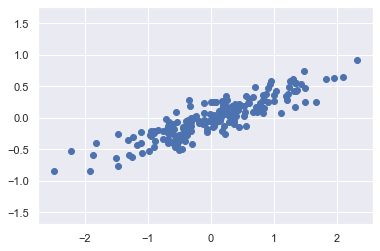

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [4]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


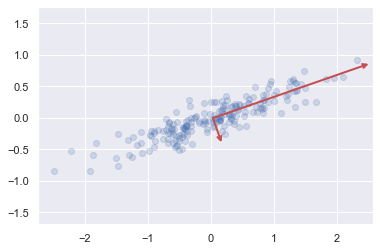

In [6]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    color='r',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = - vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [7]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


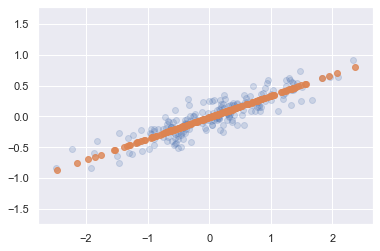

In [8]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

# Training on handwritten digits

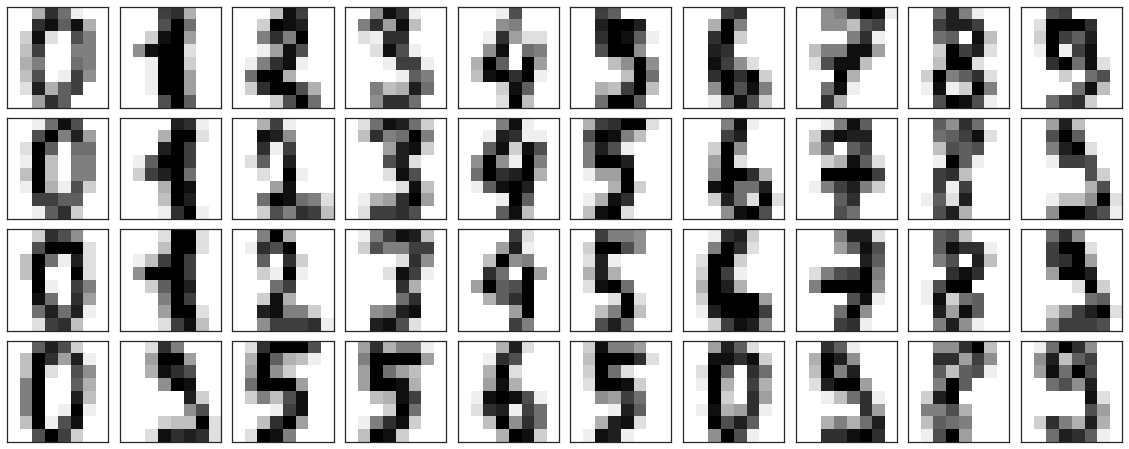

In [101]:
from sklearn import datasets
from math import sqrt

digits = datasets.load_digits()

def plot_digits(data, clim=(0,16)):
    fig, axes = plt.subplots(4, 10, figsize=(20, 8),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        sidelength = int(sqrt(len(data[i])))
        ax.imshow(data[i].reshape(sidelength, sidelength),
                  cmap='binary', interpolation='nearest',
                  clim=clim)
plot_digits(digits.data)

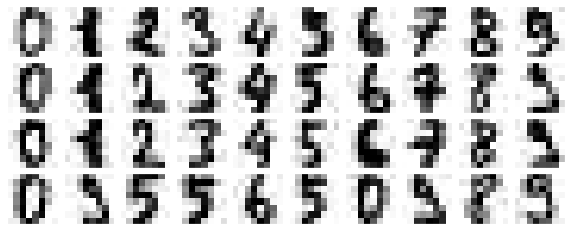

In [10]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 1)
plot_digits(noisy)

In [11]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

5

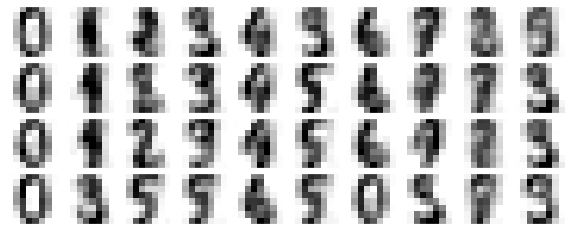

In [12]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

In [13]:
len(noisy)

1797

In [14]:
def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")
    
    approx = mean.copy()
    
    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")
    return fig

C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


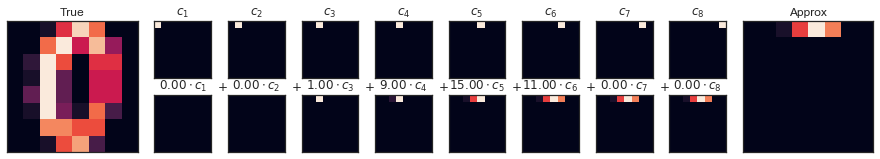

In [15]:
from sklearn.datasets import load_digits

digits = load_digits()
sns.set_style('white')

fig = plot_pca_components(digits.data[10],
                          show_mean=False)

fig.show()

Might be opposite things going on here- since we are working with data that has the SAME things (only difference is noise) 
The noise might be concentrated in the *higher* components

Test it with the digits data where the "target" is equal, see what the pca is

C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


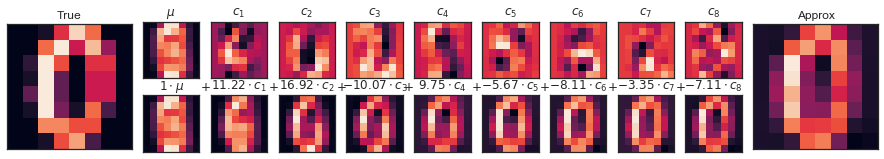

In [16]:
pca = PCA(n_components=8)
Xproj = pca.fit_transform(digits.data)
sns.set_style('white')
fig = plot_pca_components(digits.data[10], Xproj[10],
                          pca.mean_, pca.components_)

fig.show()

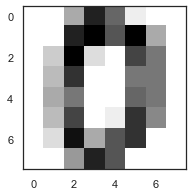

In [29]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [68]:
zero_index = np.where(digits.target == 0, True, False)

In [70]:
digits.data[zero_index]

array([[0., 0., 5., ..., 0., 0., 0.],
       [0., 0., 1., ..., 3., 0., 0.],
       [0., 0., 3., ..., 4., 0., 0.],
       ...,
       [0., 0., 9., ..., 4., 0., 0.],
       [0., 0., 5., ..., 8., 1., 0.],
       [0., 0., 6., ..., 6., 0., 0.]])

Take one digit, varying amounts of noise, fit PCA

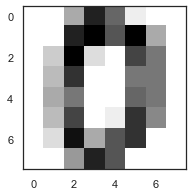

In [30]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [71]:
zeroes = digits.data[zero_index]

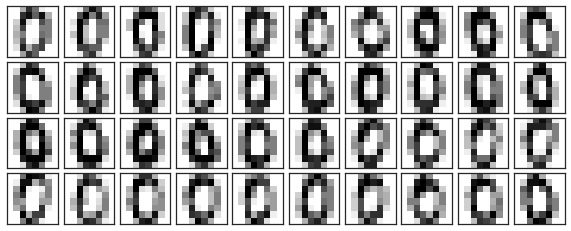

In [72]:
plot_digits(zeroes)

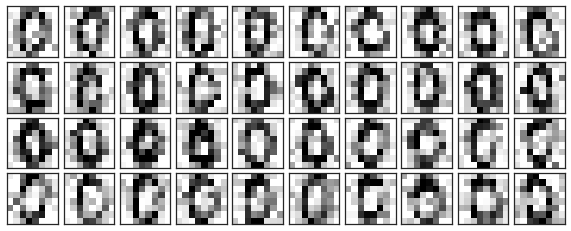

In [73]:
noisy_zeroes = np.random.normal(zeroes, 3)
plot_digits(noisy_zeroes)

In [74]:
pca = PCA(0.50).fit(noisy_zeroes)
pca.n_components_

12

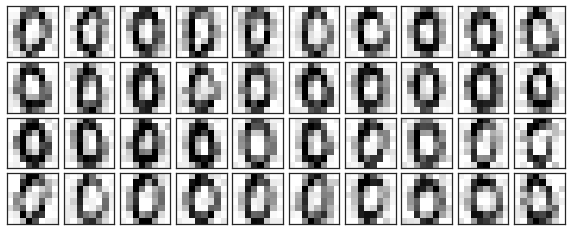

In [75]:
components = pca.transform(noisy_zeroes)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

C:\Users\gushi\Anaconda3\envs\env_full\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


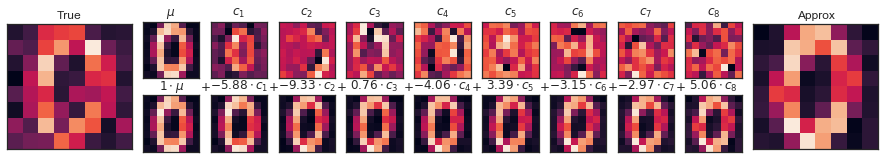

In [76]:
pca = PCA(n_components=40)
Xproj = pca.fit_transform(noisy_zeroes)
sns.set_style('white')
fig = plot_pca_components(noisy_zeroes[0], Xproj[0],
                          pca.mean_, pca.components_)

fig.show()

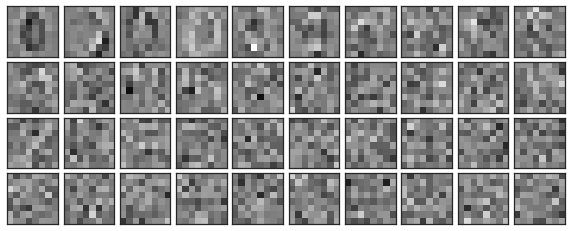

In [79]:
#pca.components_
plot_digits(pca.components_,clim=(-0.5,0.5))

In [53]:
pca.components_[0]

array([ 0.15982999,  0.0441113 , -0.04365393, -0.26045087,  0.16177318,
       -0.19406962, -0.14498198, -0.0331937 , -0.18882058,  0.16337874,
        0.12877212, -0.18420825,  0.01376994,  0.00449083,  0.11092301,
        0.11531048,  0.13494646, -0.17599379, -0.03702116,  0.0774892 ,
       -0.03480626,  0.27427741, -0.06582247,  0.10165651, -0.00427895,
        0.01225968, -0.02261663, -0.19090965,  0.27810604, -0.03912123,
       -0.19527283,  0.02332529,  0.19375511, -0.0159877 ,  0.14766472,
        0.07889131,  0.07167783,  0.0193787 ,  0.08679477, -0.03135886,
        0.02132004, -0.0370179 ,  0.12546773,  0.09997132,  0.12971634,
       -0.04873064,  0.11575146, -0.15479326, -0.0354584 ,  0.07613319,
        0.05453447, -0.05604758,  0.12083176, -0.08887323, -0.00242018,
       -0.15327503,  0.26138903, -0.1403981 ,  0.11045358, -0.05515109,
        0.1806107 ,  0.001717  , -0.11493374, -0.05955376])

In [54]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [81]:
from PIL import Image
import glob
image_list = []
for filename in glob.glob('data/fake*.png'): #assuming gif
    im=Image.open(filename)
    image_list.append(im)


In [89]:
im_array = [np.array(im).flatten() for im in image_list]

In [90]:
im_array[1].shape

(262144,)

In [92]:
pca = PCA().fit(im_array)
pca.n_components_

31

IndexError: index 31 is out of bounds for axis 0 with size 31

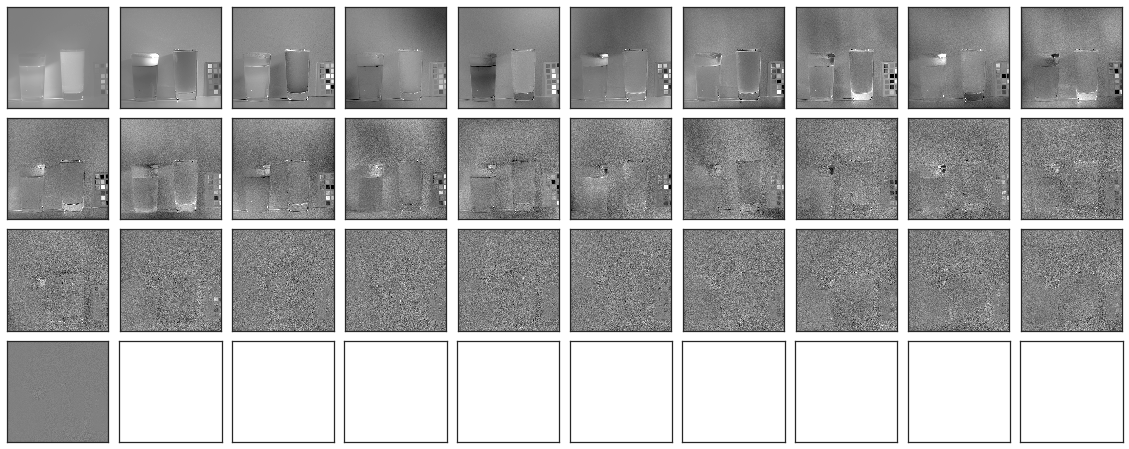

In [102]:
plot_digits(pca.components_,clim=(-0.01,0.01))